In [21]:
import matplotlib.pyplot as plt
import cv2
from skimage.restoration import denoise_wavelet, estimate_sigma
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
from skimage.io import imread
from skimage import img_as_float
import numpy as np

In [24]:
PATH = '../einstein.jpg'
#PATH = '../scimmia.jpg'
#PATH = '../1-126.jpg'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0002608044874021484..1.00061444402277].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0011231203329232354..1.013221070970472].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0043001406335942205..1.0119243127254034].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.008744524289850258..1.0110556229680945].


L'immagine è in RGB
Estimated Gaussian noise standard deviation = 0.0059352539793116514


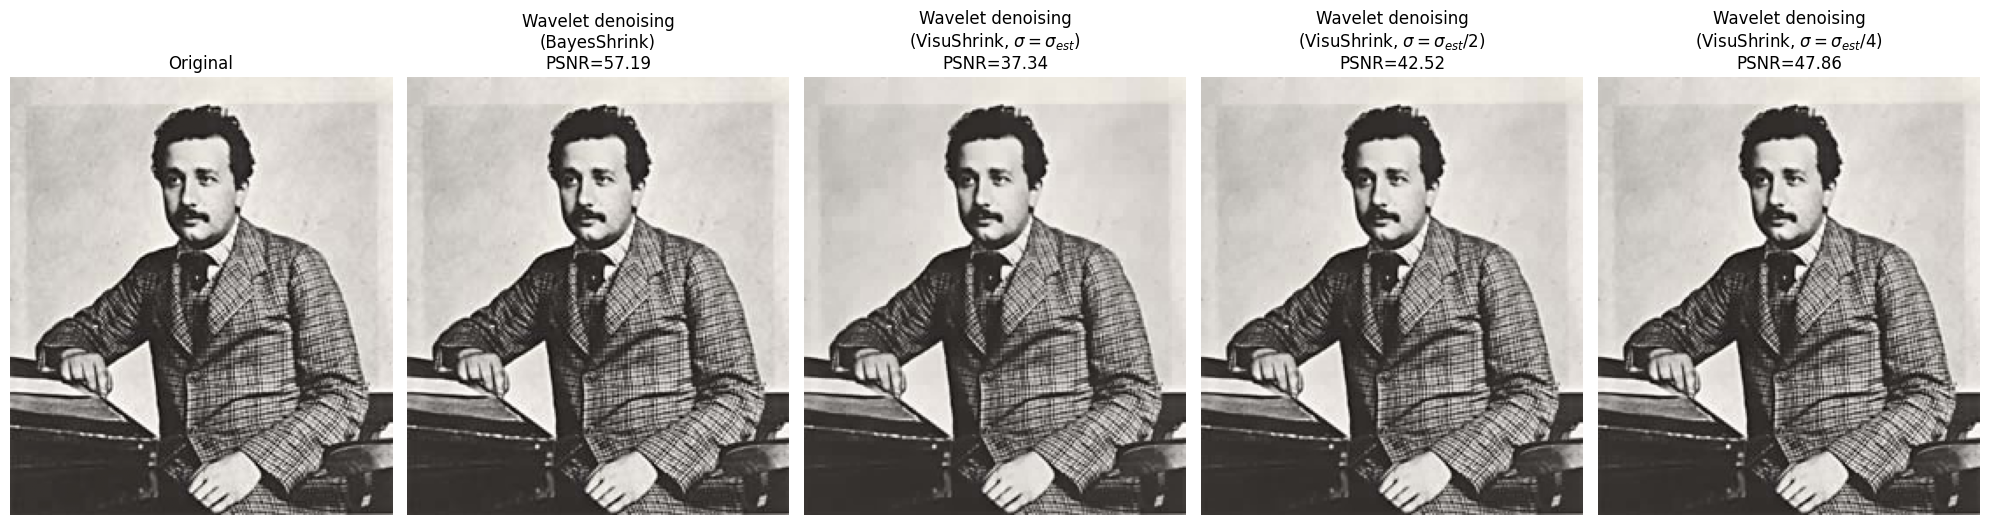

In [25]:
original = img_as_float(imread(PATH))

# Verifica se l'immagine è in RGB (deve avere 3 canali)
if original.shape[-1] == 3:
    print("L'immagine è in RGB")
else:
    print("L'immagine non è in RGB")
    original = np.stack((original,) * 3, axis=-1)

# Seleziona una regione dell'immagine
#original = original[100:250, 50:300]

# Crea una griglia per visualizzare le immagini
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 12), sharex=True, sharey=True)
plt.gray()

# Stima la deviazione standard del rumore
sigma_est = estimate_sigma(original, channel_axis=-1, average_sigmas=True)
print(f'Estimated Gaussian noise standard deviation = {sigma_est}')

# Applica il denoising usando diversi metodi
im_bayes = denoise_wavelet(
    original,
    channel_axis=-1,
    convert2ycbcr=True,
    method='BayesShrink',
    mode='soft',
    rescale_sigma=True,
)
im_visushrink = denoise_wavelet(
    original,
    channel_axis=-1,
    convert2ycbcr=True,
    method='VisuShrink',
    mode='soft',
    sigma=sigma_est,
    rescale_sigma=True,
)

# Riduzione della soglia in VisuShrink
im_visushrink2 = denoise_wavelet(
    original,
    channel_axis=-1,
    convert2ycbcr=True,
    method='VisuShrink',
    mode='soft',
    sigma=sigma_est / 2,
    rescale_sigma=True,
)
im_visushrink4 = denoise_wavelet(
    original,
    channel_axis=-1,
    convert2ycbcr=True,
    method='VisuShrink',
    mode='soft',
    sigma=sigma_est / 4,
    rescale_sigma=True,
)

# Calcolo del PSNR per ciascun metodo
psnr_bayes = peak_signal_noise_ratio(original, im_bayes)
psnr_visushrink = peak_signal_noise_ratio(original, im_visushrink)
psnr_visushrink2 = peak_signal_noise_ratio(original, im_visushrink2)
psnr_visushrink4 = peak_signal_noise_ratio(original, im_visushrink4)

# Visualizzazione delle immagini e dei risultati PSNR
ax[0].imshow(original)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(im_bayes)
ax[1].axis('off')
ax[1].set_title(f'Wavelet denoising\n(BayesShrink)\nPSNR={psnr_bayes:0.4g}')

ax[2].imshow(im_visushrink)
ax[2].axis('off')
ax[2].set_title('Wavelet denoising\n(VisuShrink, $\\sigma=\\sigma_{est}$)\n'f'PSNR={psnr_visushrink:0.4g}')

ax[3].imshow(im_visushrink2)
ax[3].axis('off')
ax[3].set_title('Wavelet denoising\n(VisuShrink, $\\sigma=\\sigma_{est}/2$)\n'f'PSNR={psnr_visushrink2:0.4g}')

ax[4].imshow(im_visushrink4)
ax[4].axis('off')
ax[4].set_title('Wavelet denoising\n(VisuShrink, $\\sigma=\\sigma_{est}/4$)\n'f'PSNR={psnr_visushrink4:0.4g}')
fig.tight_layout()

plt.show()
